# Xray Dataset

In [2]:
# from dataset.PneumothoraxDataset import *

# input_folder = "E:\data\PneumothoraxRaw"
# output_folder = "E:\data\Pneumothorax"
# preprocess = PneumothoraxPreprocess(input_folder, output_folder)

# preprocess.save_img()
# preprocess.save_txt("train")
# preprocess.save_txt("val")
# preprocess.save_txt("test")

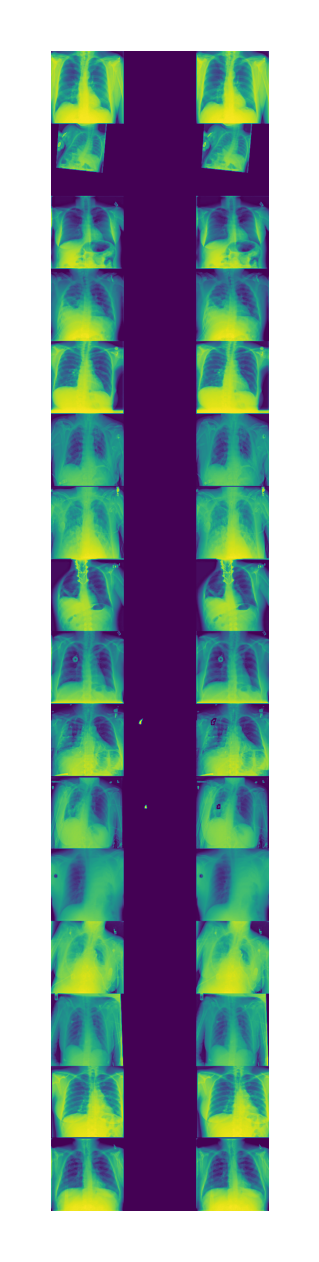

In [2]:
from data.SegmentationData import SegmentationData
from config import config
data = SegmentationData(config)
data.show_batch("val")

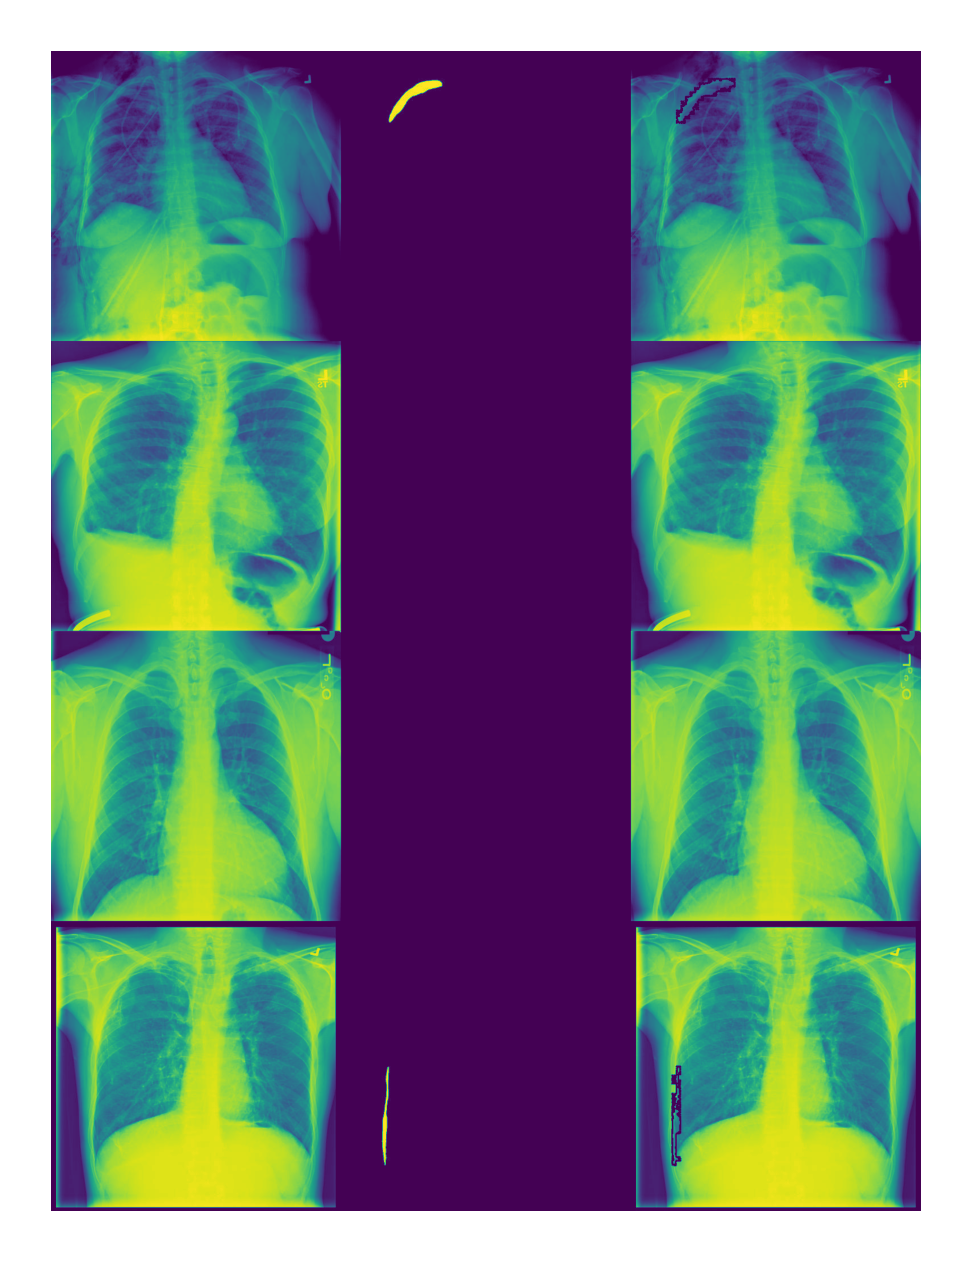

In [2]:
from dataset.PneumothoraxDataset import *
from torchvision import transforms
dataset = PneumothoraxDataset(dataset_args = {"input_folder": "E:\data\Pneumothorax"}, transform_image = transforms.ToTensor() , transform_label = transforms.ToTensor())
dataset.show_sample()

In [2]:
data = pydicom.dcmread(preprocess.train[0])
# img = pydicom.read_file(img_path).pixel_array

uid = data.SOPInstanceUID
# encoded_pixels = masks[masks["ImageId"] == uid].values[0][2]
masks = preprocess.masks
masks[masks["ImageId"] == uid].values[0][2]

'-1'

In [53]:
import numpy as np
img, mask = load_sample(img_path = preprocess.train[i], masks = preprocess.masks)
np.min(img), np.max(img), np.min(mask), np.max(mask)
plt.imsave("test.jpg", mask, cmap = "gray")
mask = plt.imread("test.jpg")
img.shape, mask.shape, np.min(img), np.max(img)

((1024, 1024), (1024, 1024, 3), 4, 238)

In [36]:
# import matplotlib.pyplot as plt
# img = plt.imread("E:\data\BrainTumor\images\\1_1.jpg")
mask = plt.imread("E:\data\BrainTumor\masks\\1_1.jpg")
# img.shape, mask.shape, np.min(img), np.max(img), np.min(mask), np.max(mask)
np.min(mask), np.max(mask)

(0, 255)

In [14]:
np.min(mask), np.max(mask)

(0.0, 255.0)

In [51]:
from dataset.BrainTumorDataset import BrainTumorDataset
import torch
from torchvision import transforms
bt = BrainTumorDataset(dataset_args = {"input_folder":"E:\data\BrainTumor"}, transform_image = transforms.Compose([]), transform_label = transforms.Compose([]))
image, mask = bt.__getitem__(1)
np.min(image), np.max(image), np.min(mask), np.max(mask)

(0, 255, 0, 255)

# Test other backbones

In [1]:
from model.unet import UnetDynamic
from model.backbone import BackBoneResnet101Dynamic
net = UnetDynamic(BackBoneResnet101Dynamic, encoder_args = {"pretrained":False}, decoder_args = {"img_size":512})

In [28]:
from torchvision.models import resnet18, resnet101, resnet34

In [1]:
from model.backbone_resnet import BackboneResnet101
backbone_resnet101 = BackboneResnet101(encoder_args = {}, decoder_args = {})

In [5]:
from model.backbone_resnet import BackboneResnet101,BackboneResnet18, BackboneResnet34, BackboneResnet50
from model.unet import Unet
net = Unet(BackboneResnet18 , decoder_args = {"type_up" : "pixel_shuffle"})

In [23]:
# net.blocks

In [24]:
sum(p.numel() for p in net.blocks.parameters() if p.requires_grad)


52765376

In [1]:
from model.backbone_densenet import BackboneDense121
from model.unet import Unet
net = Unet(BackboneDense121,encoder_args = {} , decoder_args = {})
sum(p.numel() for p in net.parameters() if p.requires_grad)
# net = Unet(BackboneResnet18VGG,encoder_args = {"input_channel":1, "output_channel":1} , decoder_args = {"bilinear":False, "pixel_shuffle":True})

23680769

In [3]:
from model.backbone import BackboneOriginal, BackboneResnet18VGG, BackboneResnet34VGG, BackboneDensenet121VGG, BackboneEfficientB0VGG
# , BackBoneResnet101, BackboneResnet18VGG, BackboneDensenet121VGG,BackboneEfficientB0VGG
from model.unet import Unet
net = Unet(BackboneResnet18VGG,encoder_args = {"pretrained":True} , 
                                   decoder_args ={"pixel_shuffle":True,
                                                  "bilinear":False
                                                    })
sum(p.numel() for p in net.parameters() if p.requires_grad), sum(p.numel() for p in net.blocks.parameters() if p.requires_grad)
# net = Unet(BackboneResnet18VGG,encoder_args = {"input_channel":1, "output_channel":1} , decoder_args = {"bilinear":False, "pixel_shuffle":True})

(23125097, 11418624)

In [4]:
import torch
x = torch.empty((1, 1, 512, 512))
net(x).shape

conv1 torch.Size([1, 64, 256, 256])
bn1 torch.Size([1, 64, 256, 256])
relu torch.Size([1, 64, 256, 256])
maxpool torch.Size([1, 64, 128, 128])
layer1 torch.Size([1, 64, 128, 128])
layer2 torch.Size([1, 128, 64, 64])
layer3 torch.Size([1, 256, 32, 32])
layer4 torch.Size([1, 512, 16, 16])
layer3 torch.Size([1, 512, 32, 32])
layer2 torch.Size([1, 256, 64, 64])
layer1 torch.Size([1, 128, 128, 128])
relu torch.Size([1, 64, 256, 256])


torch.Size([1, 1, 512, 512])

In [15]:
from torchvision.models import densenet121, vgg16, resnet18, resnet34
net = vgg16().features
sum(p.numel() for p in net.parameters() if p.requires_grad)

14714688

In [1]:
from torchvision.models import densenet121, vgg16, resnet18, resnet34
net = resnet18()
sum(p.numel() for p in net.parameters() if p.requires_grad)
# net

11689512

In [1]:
from model.backbone import BackboneOriginal
bb = BackboneOriginal(encoder_args = {}, decoder_args = {})

In [8]:
a = 1.2
b = 1.1
c = 1.15
o = 4
b**o, a**o, 224*(c**o)

(1.4641000000000004, 2.0736, 391.7773999999999)

In [12]:
import re
re.split(r'(\d.*)', "o16")

['o', '16', '']

In [36]:
x = []
x.extend([1])
x

[1]

## Test CRF


In [12]:
import torch
import torch.nn as nn
from crfseg import CRF

model = nn.Sequential(
    nn.Conv2d(1, 1, kernel_size =2, stride = 2),
    CRF(n_spatial_dims=2)
)

batch_size, n_channels, spatial = 10, 1, (100, 100)
x = torch.zeros(batch_size, n_channels, *spatial)
log_proba = model(x)
x.shape, log_proba.shape

(torch.Size([10, 1, 100, 100]), torch.Size([10, 1, 50, 50]))

(torch.Size([10, 1, 100, 100]), torch.Size([10, 1, 100, 100]))

# Test loss

In [3]:
from loss.loss import FocalLoss
clc = FocalLoss()
import torch
x = torch.Tensor([0.1, 0.2, 0.6, 0.3])
y = torch.Tensor([0, 1, 1, 0])
clc(x, y)

tensor(0.0415)

In [4]:
from loss.loss import DiceLoss
import torch
import torch.nn as nn
import torch.nn.functional as F

def test_BFL():
#     output = 40*(torch.randint(0,2,(1,1,32,32,32))-0.5)
    output = 40*(torch.randint(0, 2, (2,2))-0.5)
    target = torch.zeros_like(output)
    target[output<0] = 1
#     print(torch.min(output), torch.max(output))
#     print(torch.min(target), torch.max(target))
#     print(output.shape, target.shape)
#     target = torch.randint(0,2,(1,1,32,32,32))
    print(output)
    print(target)
    criterion = DiceLoss(activation = nn.Sigmoid(), epsilon = 0)   
    
    loss = criterion(output,target)
    print(loss.item())
test_BFL()

tensor([[20., 20.],
        [20., 20.]])
tensor([[0., 0.],
        [0., 0.]])
1.0


In [13]:
import numpy as np
np.round(2.0612e-09)

0.0

In [33]:

(20*0.75*2+20*0.25*2)/4


10.0

# Test visualize

In [6]:
from visualize.visualize import Visualize
vis = Visualize()

TypeError: __init__() missing 3 required positional arguments: 'current_epoch', 'epochs', and 'data'

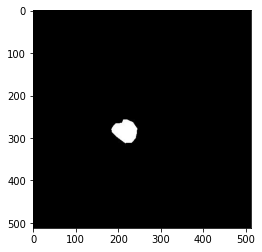

In [13]:
import matplotlib.pyplot as plt
# vis.plot_loss_update(0.1, 0.5)
image = plt.imread("E:\data\BrainTumor\masks\\7_1.jpg")
# vis.update_image(image[:,:,0])
plt.imshow(image)
plt.show()

# Test SegmentationData

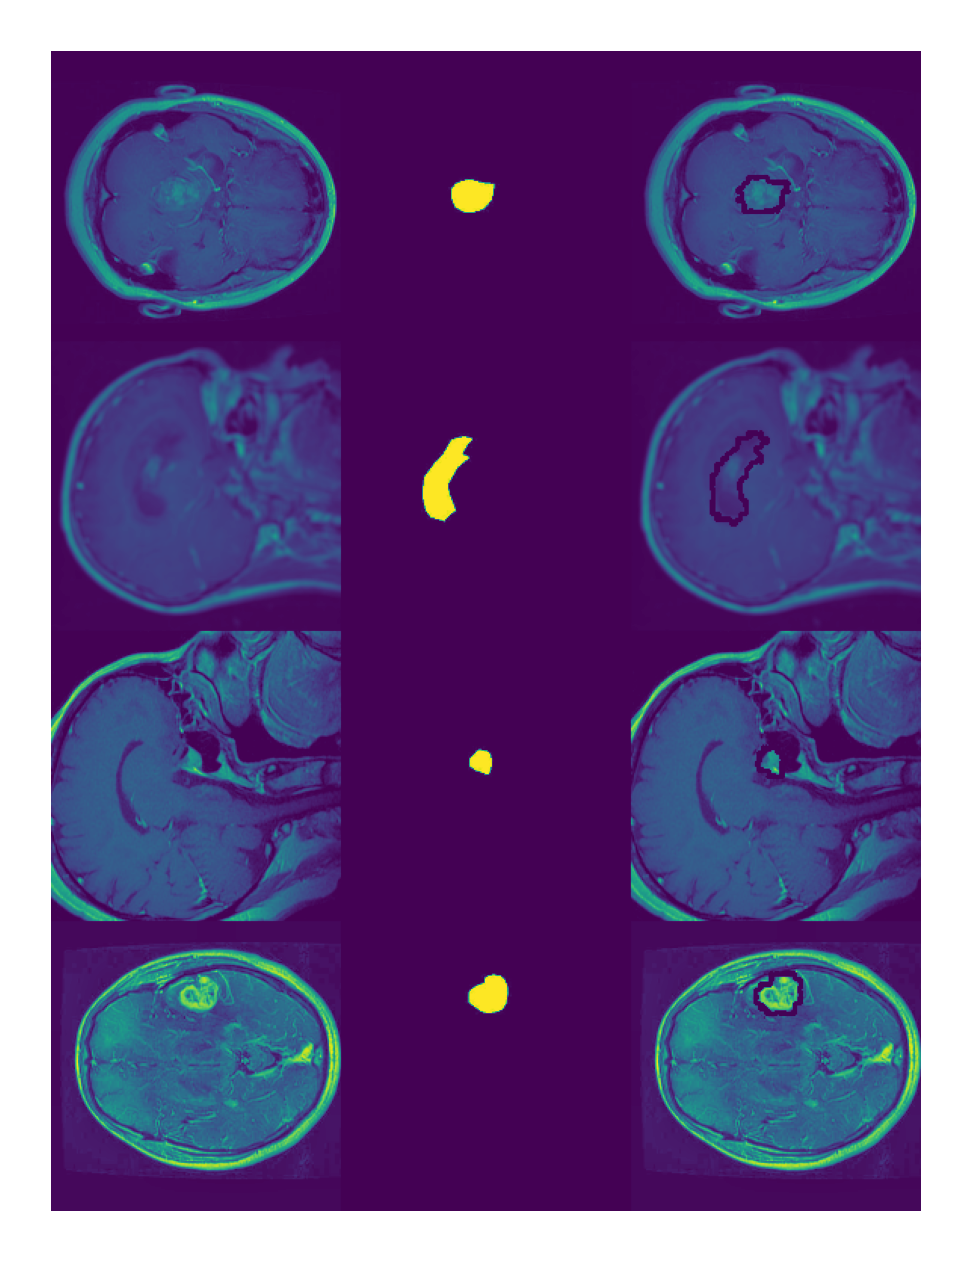

In [1]:
from data.SegmentationData import SegmentationData
from config import config
data = SegmentationData(config)
data.show_batch()

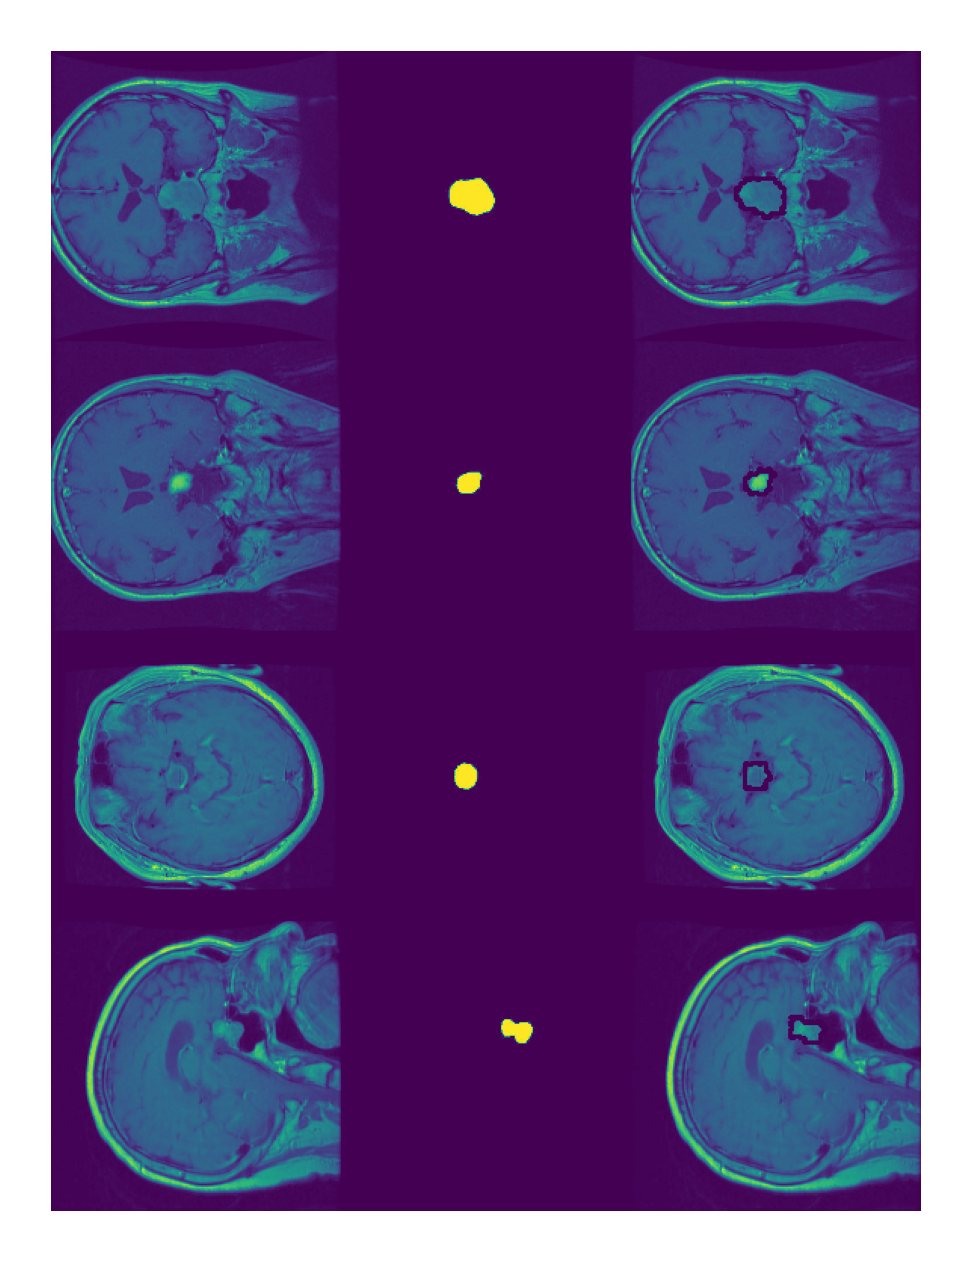

In [2]:
data.test_dataset.show_sample()

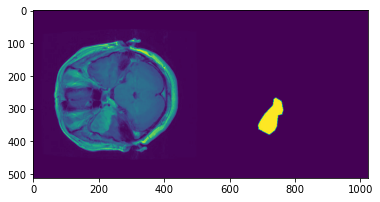

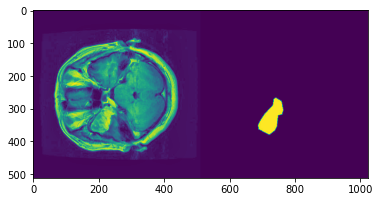

In [27]:
import matplotlib.pyplot as plt
image = plt.imread("E:\data\BrainTumor\images\\1_1.jpg")
mask = plt.imread("E:\data\BrainTumor\masks\\1_1.jpg")

import albumentations as A
from dataset.transform import *
aug = A.Compose([
            A.CLAHE(p=1)
        ])
visualize(aug, image, mask)

In [33]:
import numpy.ma as ma
a = np.arange(4)
x = ma.masked_equal(a, 0)
(x - x.min())*255/(x.max()-x.min())


masked_array(data=[--, 0.0, 127.5, 255.0],
             mask=[ True, False, False, False],
       fill_value=0)

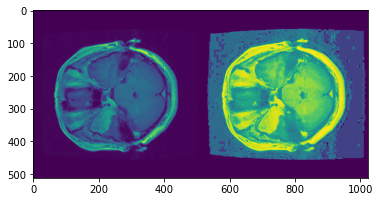

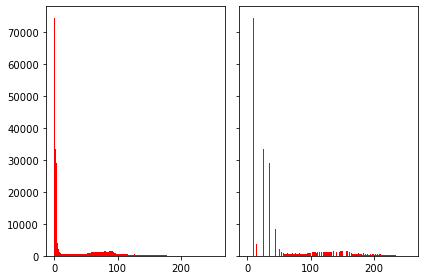

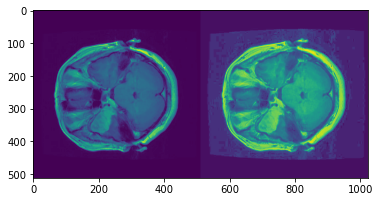

In [78]:
import numpy as np
import cv2 as cv
img = plt.imread("E:\data\BrainTumor\images\\1_1.jpg")[:,:,0]
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res)
plt.show()
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=10, tileGridSize=(1, 1))
cl1 = clahe.apply(img)
import matplotlib.pyplot as plt
# print(img.shape, cl1.shape)
# plt.imshow(np.hstack([img, cl1]))
# plt.show()
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 20
axs[0].hist(img.flatten(),256,[0,256], color = 'r')
axs[1].hist(cl1.flatten(),256,[0,256], color = 'r')
plt.show()
plt.imshow(np.hstack([img, cl1]))
plt.show()


In [63]:
img.shape

(512, 512)

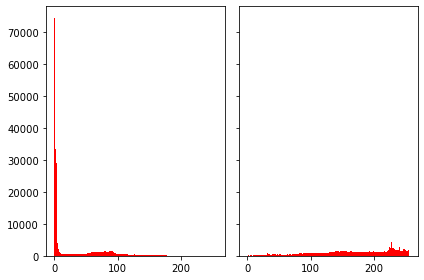

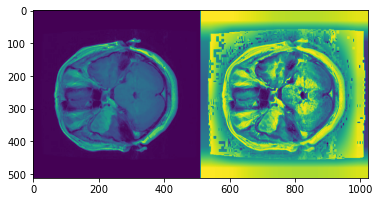

In [28]:
import numpy as np
import cv2 as cv
img = cv.imread("E:\data\BrainTumor\images\\1_1.jpg",0)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=1000000, tileGridSize=(8,8))
cl1 = clahe.apply(img)
import matplotlib.pyplot as plt
# print(img.shape, cl1.shape)
# plt.imshow(np.hstack([img, cl1]))
# plt.show()
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
n_bins = 20
axs[0].hist(img.flatten(),256,[0,256], color = 'r')
axs[1].hist(cl1.flatten(),256,[0,256], color = 'r')
plt.show()
plt.imshow(np.hstack([img, cl1]))
plt.show()

# Test trainer

In [1]:
from data.SegmentationData import SegmentationData
from config import config
from train.train import Trainer
import torch
data = SegmentationData(config)
trainer = Trainer(config, data)

None


In [1]:
# sampler = trainer.data.load_batch("train")
# images = sampler[0][0:1].to(trainer.device)
# labels = sampler[1][0:1].to(trainer.device)
# trainer.net.eval()
# with torch.no_grad():
#     outputs = trainer.net(images)
#     outputs_sigmoid = torch.sigmoid(outputs)

In [2]:
trainer.train()

KeyboardInterrupt: 

In [6]:
trainer.crition(labels, outputs)

tensor(0.6984)

# Test Model

In [ ]:
from data.SegmentationData import SegmentationData
from config import config
data = SegmentationData(config)

In [ ]:
from model.Unet import Unet
import torch
x = torch.ones([1, 1, 192, 192])
net = Unet(1, 1, padding = 1)
x.shape, net(x).shape

In [ ]:
from model.Unet import Up
import torch
x = torch.empty([1, 1024, 4, 4])
up = Up([1024, 512, 512])
up(x)

In [ ]:
import torch.nn as nn
from model.Unet import MultiConv
MultiConv([2, 1, 1], True, 0)(x1)

nn.BatchNorm2d(1)(x2).sum()

In [ ]:
import torch
import torch.nn.functional as F



diffY = x2.size()[2] - x1.size()[2]
diffX = x2.size()[3] - x1.size()[3]

x2 = F.pad(x2, [
        -diffX//2, -diffX//2,
        -diffY//2, -diffY//2
        ])
x1.shape, x2.shape

# Test BrainTumorDataset

In [ ]:
from dataset.BrainTumorDataset import BrainTumorDataset
import torchvision.transforms as transforms

transform_train = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.ToTensor()
]
)
dataset_args = {
    "input_folder":'E:\data\BrainTumor',
}
dataset = BrainTumorDataset(dataset_args, transform_train, "train")

In [ ]:
dataset.show_sample()

# Test split train val

In [ ]:
from dataset.BrainTumorDataset import PrepairBrainTumorDataset
prepaireDataset = PrepairBrainTumorDataset('E:\data\BrainTumorRaw','E:\data\BrainTumor')
prepaireDataset.split_train_test_val()